<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
import requests
from bs4 import BeautifulSoup
import csv

Download the webpage at the url


In [3]:
#your code goes here
# URL containing the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Fetch the HTML content of the web page
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the web page")
else:
    print(f"Failed to fetch the web page: {response.status_code}")

Successfully fetched the web page



Create a soup object


In [4]:
#your code goes here
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Extract the table containing the data
table = soup.find("table")

# Initialize a list to hold the extracted data
data = []

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
# Extract table headers
headers = [header.text for header in table.find_all("th")]

# Extract table rows
rows = table.find_all("tr")
for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    data.append(cols)

Save the scrapped data into a file named *popular-languages.csv*


In [5]:
# your code goes here
# Extracting the header row (for column names)
headers = ['Programming Language', 'Average Annual Salary']

# Iterate over the rows of the table and extract the data for each language and its salary
for row in table.find_all("tr")[1:]:  # Skip the header row (first row)
    cols = row.find_all("td")
    if len(cols) > 1:
        language = cols[0].text.strip()
        salary = cols[1].text.strip()
        data.append([language, salary])

# Write data to a CSV file
popular_languages = "programming_languages_salaries.csv"
with open(popular_languages, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Write headers
    writer.writerow(headers)
    # Write data rows
    writer.writerows(data)

print(f"Data successfully written to {popular_languages}")

Data successfully written to programming_languages_salaries.csv


   Programming Language Average Annual Salary
0                     1                Python
1                     2                  Java
2                     3                     R
3                     4            Javascript
4                     5                 Swift


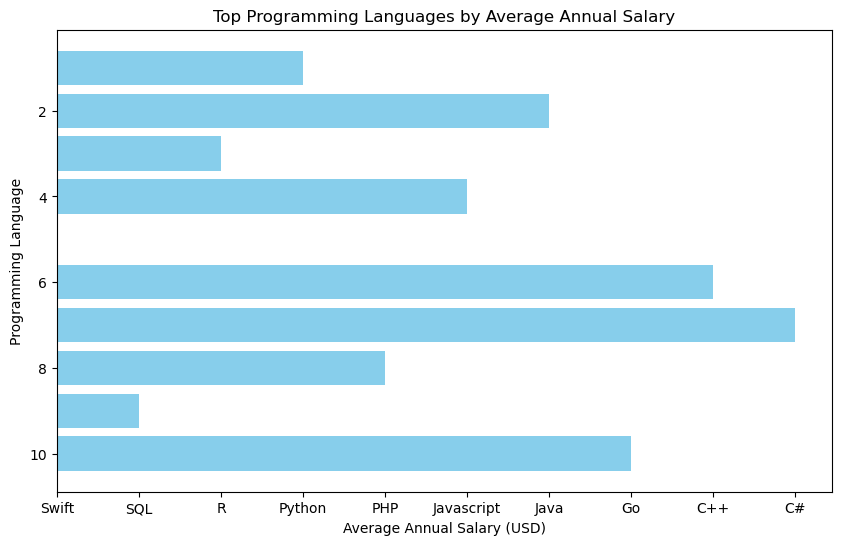

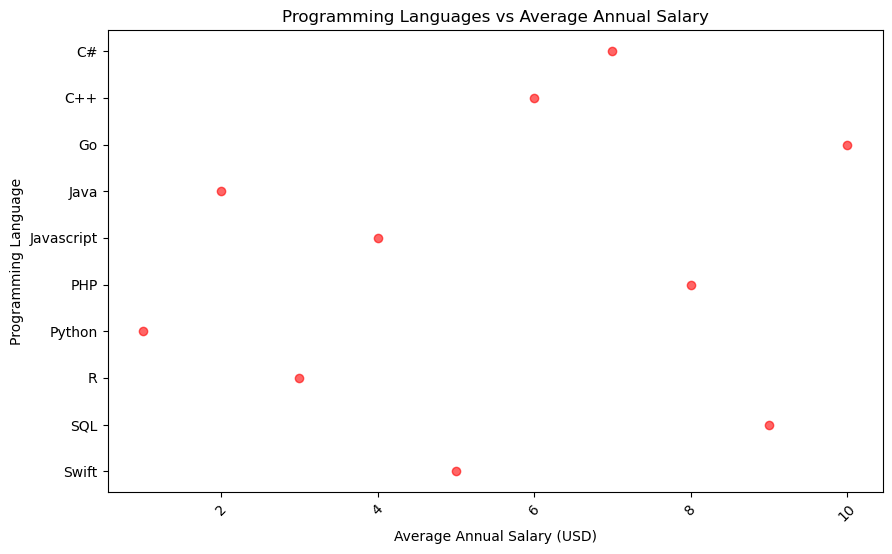

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing programming languages and their salaries
data = pd.read_csv(popular_languages)

# Check the first few rows of the data to understand its structure
print(data.head())

# Sort the data by average salary in descending order
data_sorted = data.sort_values(by='Average Annual Salary', ascending=False)

# Bar chart for programming languages sorted by average annual salary
plt.figure(figsize=(10, 6))
plt.barh(data_sorted['Programming Language'], data_sorted['Average Annual Salary'], color='skyblue')
plt.xlabel('Average Annual Salary (USD)')
plt.ylabel('Programming Language')
plt.title('Top Programming Languages by Average Annual Salary')
plt.gca().invert_yaxis()  # To display the highest salary on top
plt.show()

# Scatter plot for programming languages vs average salary
plt.figure(figsize=(10, 6))
plt.scatter(data_sorted['Programming Language'], data_sorted['Average Annual Salary'], color='red', alpha=0.6)
plt.xlabel('Average Annual Salary (USD)')
plt.ylabel('Programming Language')
plt.title('Programming Languages vs Average Annual Salary')
plt.xticks(rotation=45)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
